In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,make_scorer,confusion_matrix

import timeit

%matplotlib inline
sns.set_style("dark")

In [29]:
ipadd=pd.read_csv('/content/IpAddress_to_Country.csv')
fraud=pd.read_csv('/content/fraud_data_de.csv')

In [30]:
print("Frauds table has rows:---",fraud.shape[0])
print("Frauds table has columns:---",fraud.shape[1])
print("Ipadress table has rows:---",ipadd.shape[0])
print("Ipadress table has columns:---",ipadd.shape[1])

Frauds table has rows:--- 151112
Frauds table has columns:--- 12
Ipadress table has rows:--- 138846
Ipadress table has columns:--- 3


In [31]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown Country
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [32]:
ipadd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [33]:
def country_map(ip_ad):
    countries=ipadd.loc[(ipadd['upper_bound_ip_address'] >= ip_ad) & (ipadd['lower_bound_ip_address'] <= ip_ad),'country'].values
    #Account for nulls
    if len(countries)==0:
        return np.nan
    return countries[0]

In [34]:
fraud['country'] = fraud['ip_address'].apply(lambda row: country_map(row))

In [35]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown Country,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,United States


In [36]:
fraud.isna().sum()

,0
user_id,0
signup_time,0
purchase_time,0
purchase_value,0
device_id,0
source,0
browser,0
sex,0
age,0
ip_address,0


In [37]:

fraud.dtypes

,0
user_id,int64
signup_time,object
purchase_time,object
purchase_value,int64
device_id,object
source,object
browser,object
sex,object
age,int64
ip_address,float64


In [38]:
fraud.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [39]:
#Purchse value by device id
device_pv = pd.DataFrame(fraud[['device_id','purchase_value']].groupby('device_id').sum()
                         .sort_values(by='purchase_value',ascending=False))
device_pv.reset_index(inplace=True)

In [40]:
device_pv.head()

,device_id,purchase_value
0,KPAAACGRQWYIK,1458
1,UOMHJMHDVTLAS,1376
2,EQYVNEGOFLAWK,1369
3,KHHAMKJCMODJA,1320
4,TZSHXHDMKLRYJ,1288


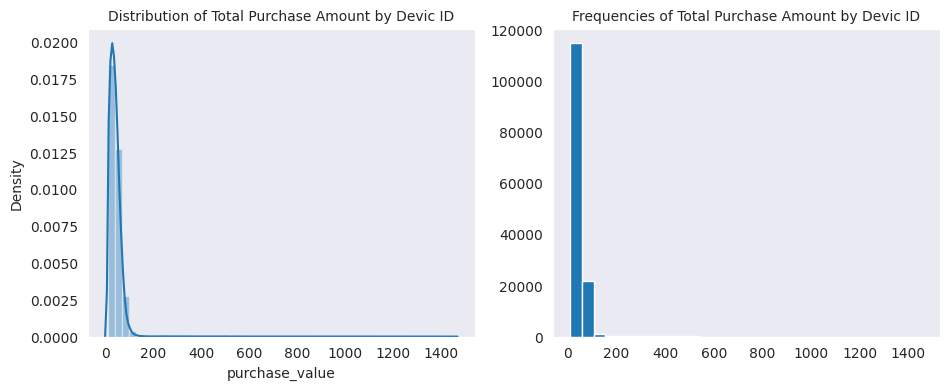

In [41]:
#purchase value distribution
f, (ax1, ax2) = plt.subplots(1,2,figsize=(11,4))
sns.distplot(device_pv['purchase_value'],ax=ax1)
ax2.hist(device_pv['purchase_value'],bins=30)
ax1.set_title("Distribution of Total Purchase Amount by Devic ID",fontsize=10)
ax2.set_title("Frequencies of Total Purchase Amount by Devic ID",fontsize=10);

In [53]:
def create_eda_bar(col):
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x= fraud[col].unique(),y=fraud[col].value_counts(), palette ='viridis')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1000),fontsize=12)
    ax.set_title("Unqiue Values and Counts of " + col[0].upper() + col[1:],fontsize=14)

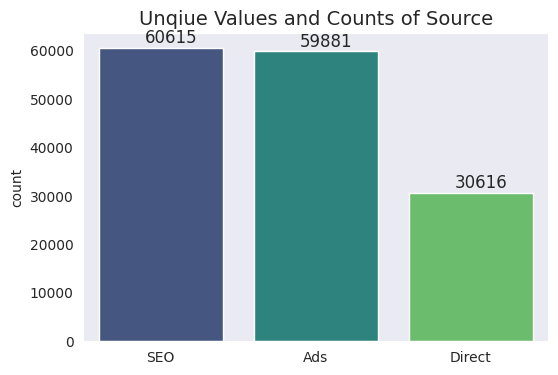

In [54]:
#Count of Source
create_eda_bar('source')

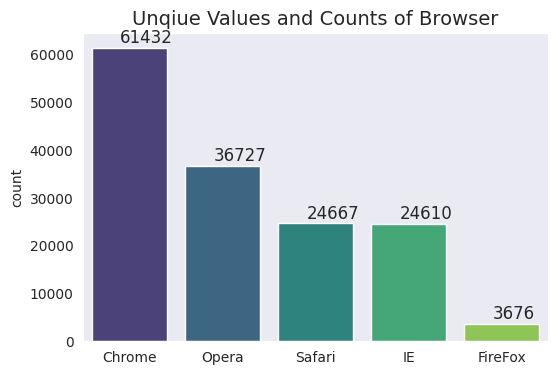

In [55]:
#count of Browser used to purchase
create_eda_bar('browser')


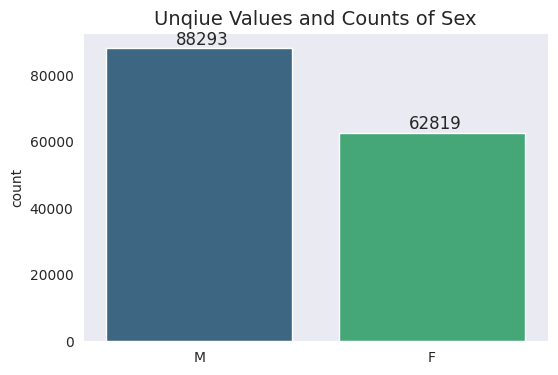

In [56]:
#count of Se used to purchase
create_eda_bar('sex')

In [57]:
fraud['class'].value_counts(normalize=True)

,proportion
class,
0,0.906354
1,0.093646


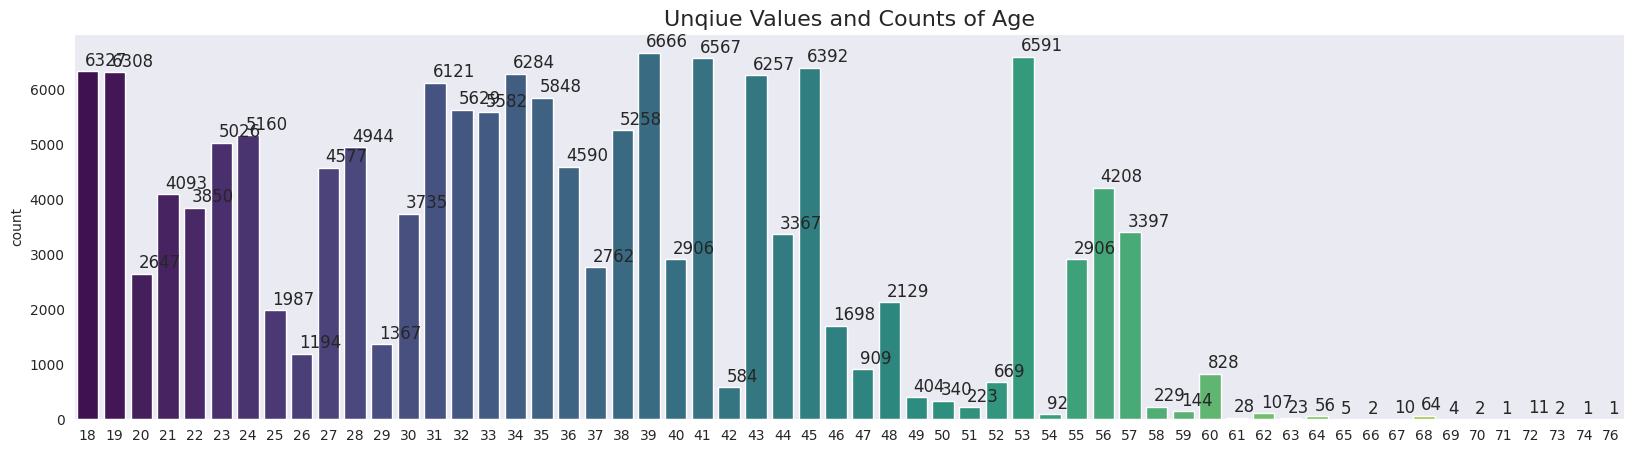

In [65]:
#Total purchase by ages
plt.figure(figsize=(20,5))
ax = sns.barplot(x= fraud['age'].unique(), y =fraud['age'].value_counts(), palette='viridis')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+100),fontsize=12)
ax.set_title("Unqiue Values and Counts of Age",fontsize=16);

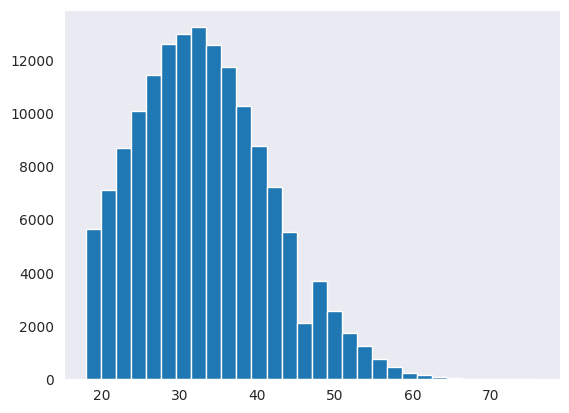

In [66]:
#DIstribution of Age column
plt.hist(fraud['age'],bins=30);

In [67]:
#count of puchase by class(fraud(0,1))
fraud[['purchase_value','class']].groupby('class').mean()

,purchase_value
class,
0,36.929418
1,36.993004


In [68]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])

In [69]:
fraud['signup_time'].min(), fraud['signup_time'].max()

(Timestamp('2015-01-01 00:00:42'), Timestamp('2015-08-18 04:40:29'))

In [70]:
fraud['purchase_time'].min(), fraud['purchase_time'].max()

(Timestamp('2015-01-01 00:00:44'), Timestamp('2015-12-16 02:56:05'))

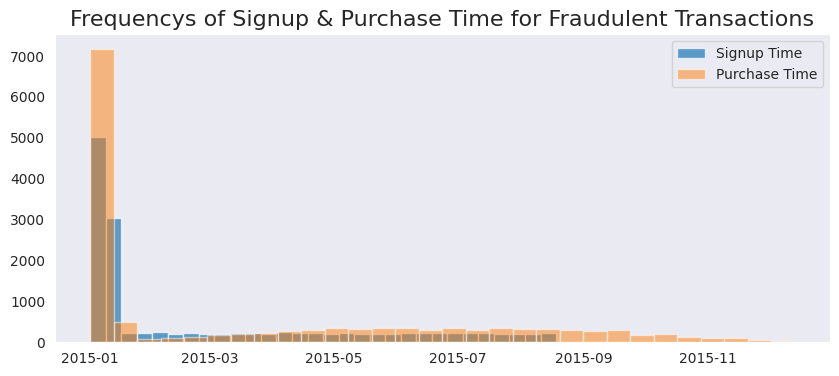

In [71]:
#checking purchase time and signuptime distribution(frauds)
plt.figure(figsize=(10,4))
plt.hist(fraud['signup_time'][fraud['class']==1],bins=30,alpha=0.7, label="Signup Time")
plt.hist(fraud['purchase_time'][fraud['class']==1],bins=30,alpha=0.5,label="Purchase Time")
plt.title("Frequencys of Signup & Purchase Time for Fraudulent Transactions",fontsize=16)
plt.legend();

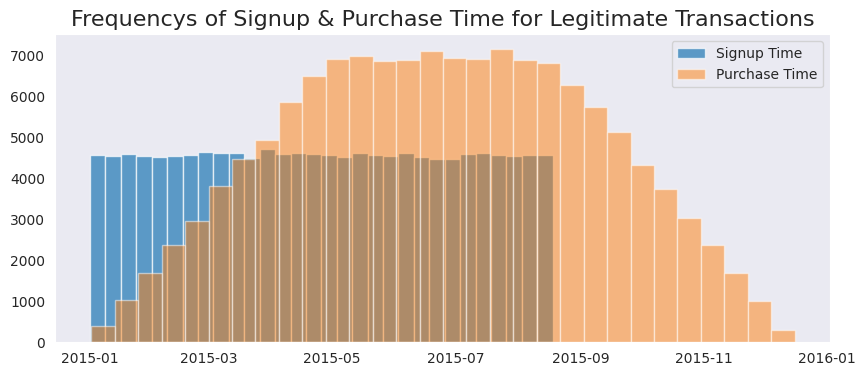

In [72]:
#checking purchase time and signuptime distribution(non-frauds)
plt.figure(figsize=(10,4))
plt.hist(fraud['signup_time'][fraud['class']==0],bins=30,alpha=0.7, label="Signup Time")
plt.hist(fraud['purchase_time'][fraud['class']==0],bins=30,alpha=0.5,label="Purchase Time")
plt.title("Frequencys of Signup & Purchase Time for Legitimate Transactions",fontsize=16)
plt.legend();

In [75]:
#checking the fraud trascation by using beoswer
def fraud_no_fraud_chart(col):
    df1 = pd.DataFrame(fraud[fraud['class']==1].groupby(col).count())
    df0 = pd.DataFrame(fraud[fraud['class']==0].groupby(col).count())

    fig, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)

    sns.barplot(x= df1.index.unique(),y =df1['class'],ax=ax[0], palette='viridis')
    sns.barplot(x= df0.index.unique(),y = df0['class'],ax=ax[1], palette='viridis' )
    ax[0].set_title(col[0].upper() + col[1:] + " for Fraudulent Transactions",fontsize=14)
    ax[1].set_title(col[0].upper() + col[1:] + " for Legitimate Transactions",fontsize=14);

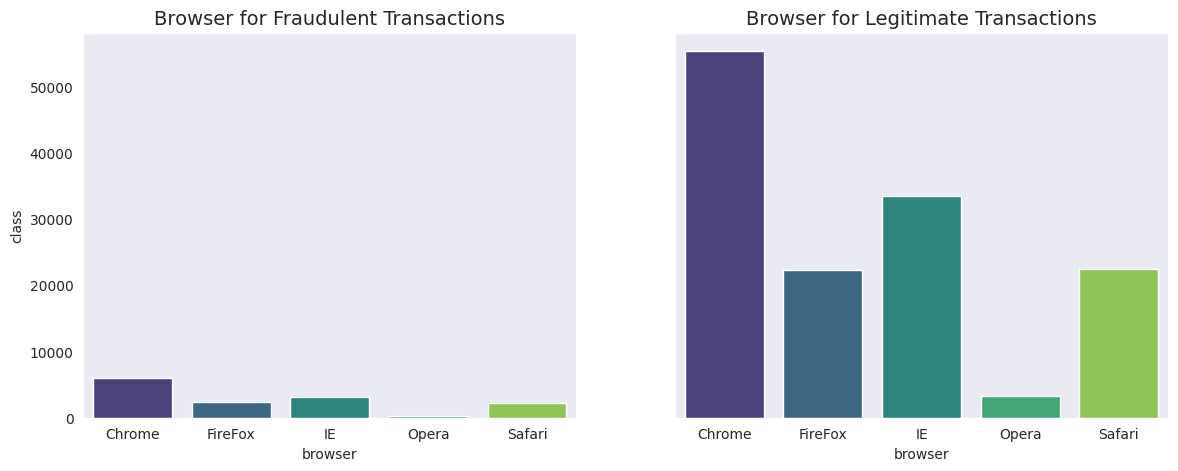

In [76]:
fraud_no_fraud_chart('browser')

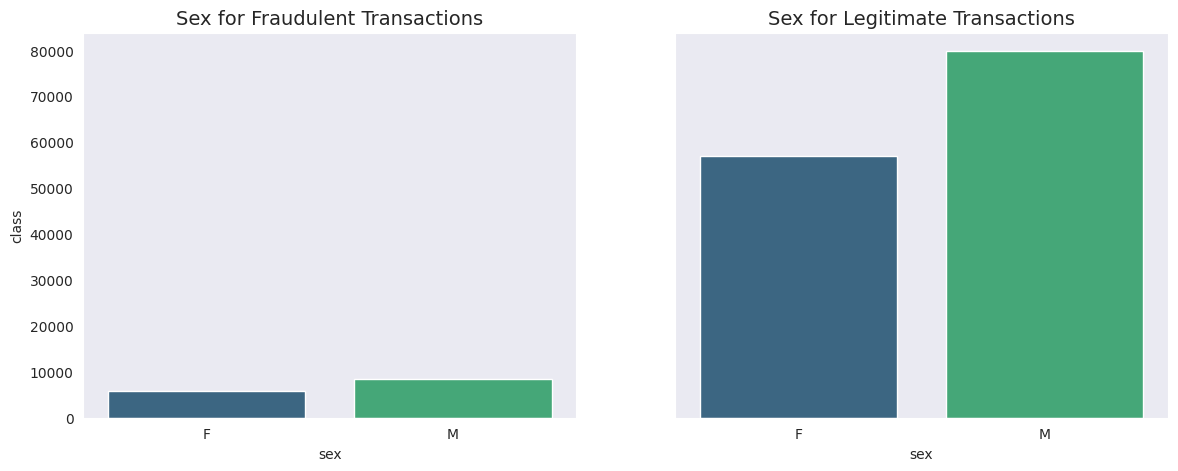

In [77]:
#checking the fraud trascation by using sex
fraud_no_fraud_chart('sex')

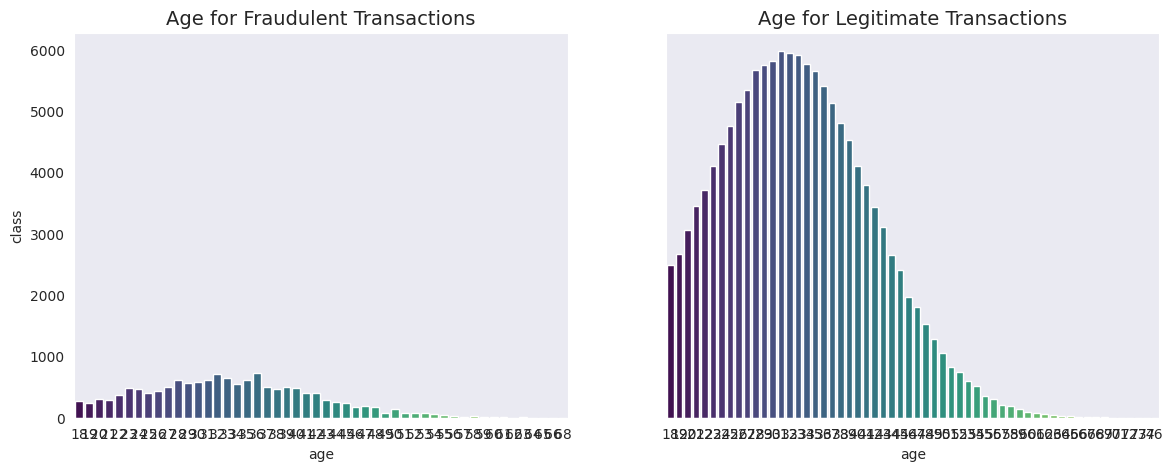

In [78]:
#checking the fraud trascation by using age
fraud_no_fraud_chart('age')

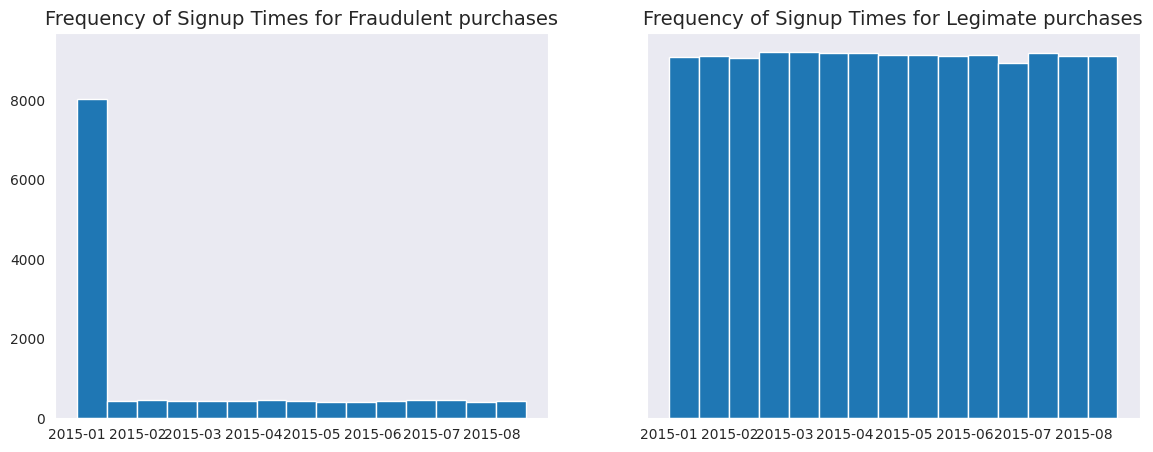

In [79]:
#checking the fraud and legimate singhups
fig, ax = plt.subplots(1,2, figsize = (14,5),sharey=True)
ax[0].hist(fraud['signup_time'][fraud['class']==1],bins=15)
ax[0].set_title("Frequency of Signup Times for Fraudulent purchases",fontsize=14)
ax[1].hist(fraud['signup_time'][fraud['class']==0],bins=15)
ax[1].set_title("Frequency of Signup Times for Legimate purchases",fontsize=14);

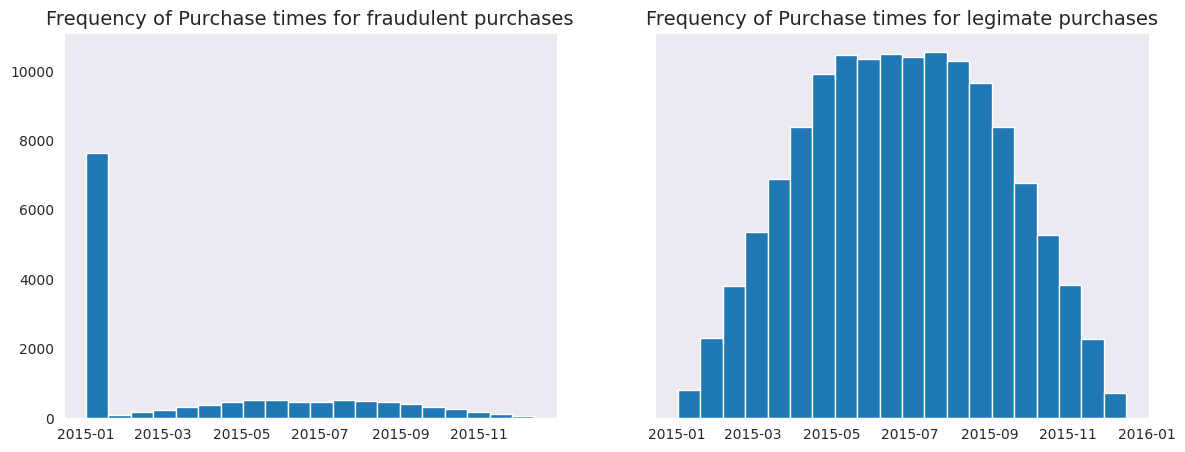

In [80]:
#Checking frauds and legimate transcation of purchase time
fig, ax = plt.subplots(1,2, figsize = (14,5),sharey=True)
ax[0].hist(fraud['purchase_time'][fraud['class']==1],bins=20)
ax[0].set_title("Frequency of Purchase times for fraudulent purchases",fontsize=14)
ax[1].hist(fraud['purchase_time'][fraud['class']==0],bins=20)
ax[1].set_title("Frequency of Purchase times for legimate purchases",fontsize=14);

In [81]:
fraud['country'].isna().sum()

21966

In [82]:
len(fraud['country'].sort_values().unique())

182

In [83]:
# counting Total transcations by countries
totals_by_country = fraud[['country','class']].groupby('country').count().sort_values('class',ascending=False)
#tota_by_country

#Fraudulent Transactions by country
fraud_by_country = fraud[['country','class']][fraud['class']==1].groupby('country').count().sort_values('class',ascending=False)
fraud_by_country.reset_index(inplace=True)

rate_df = pd.DataFrame(totals_by_country)
rate_df.reset_index(inplace=True)
rate_df2 = rate_df.merge(fraud_by_country,on='country')
rate_df2['ratio'] = rate_df2['class_y']/rate_df2['class_x']
rate_df2.rename(columns={'class_x':'total_transactions','class_y':'total_fraudulent'},inplace=True)

In [84]:
rate_df3 = rate_df2[rate_df2['ratio']>=.10].sort_values('ratio',ascending=False)
rate_df3

,country,total_transactions,total_fraudulent,ratio
108,Turkmenistan,1,1,1.000000
90,Namibia,23,10,0.434783
83,Sri Lanka,31,13,0.419355
70,Luxembourg,72,28,0.388889
107,Virgin Islands (U.S.),3,1,0.333333
58,Ecuador,106,28,0.264151
56,Tunisia,118,31,0.262712
55,Peru,119,31,0.260504
75,Bolivia,53,13,0.245283
64,Kuwait,90,21,0.233333


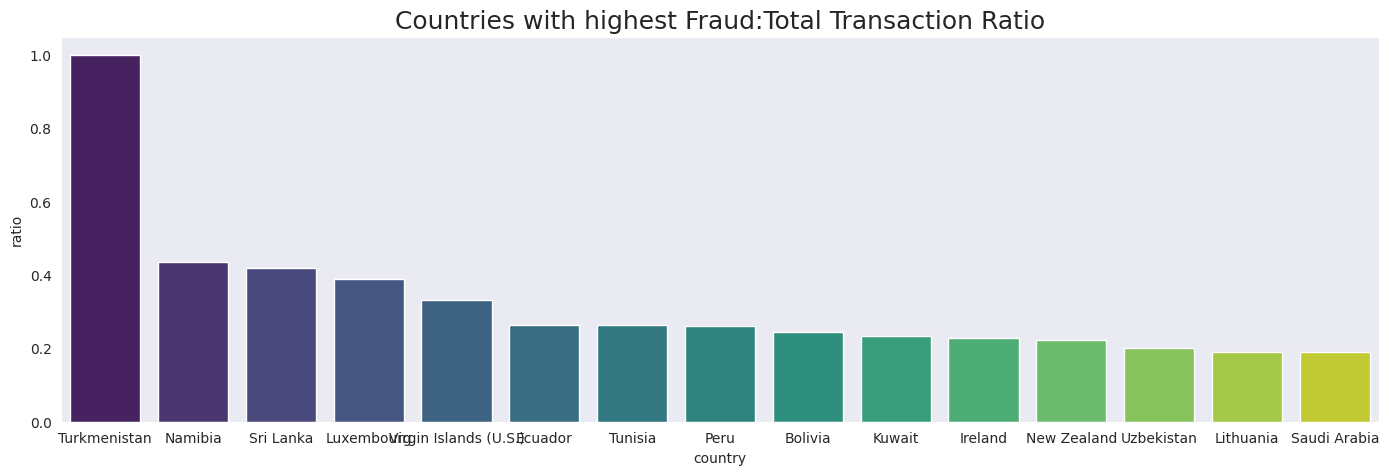

In [86]:
#checking the top 10 country by doing frauds transcations ratios
plt.figure(figsize=(17,5))
ax = sns.barplot(x=rate_df3['country'].head(15),y=rate_df3['ratio'].head(15), palette='viridis')
ax.set_title("Countries with highest Fraud:Total Transaction Ratio",fontsize=18);

In [87]:
rate_df4 = rate_df2.sort_values('total_fraudulent',ascending=False).head(20)
rate_df4

,country,total_transactions,total_fraudulent,ratio
0,United States,58049,5551,0.095626
1,China,12038,1043,0.086642
2,Japan,7306,715,0.097865
3,United Kingdom,4490,477,0.106236
4,Korea Republic of,4162,380,0.091302
7,Canada,2975,348,0.116975
6,France,3161,300,0.094907
8,Brazil,2961,270,0.091185
5,Germany,3646,262,0.071860
9,Italy,1944,166,0.085391


Text(0.5, 1.0, 'Countries with highest Fraud:Total Transaction Count')

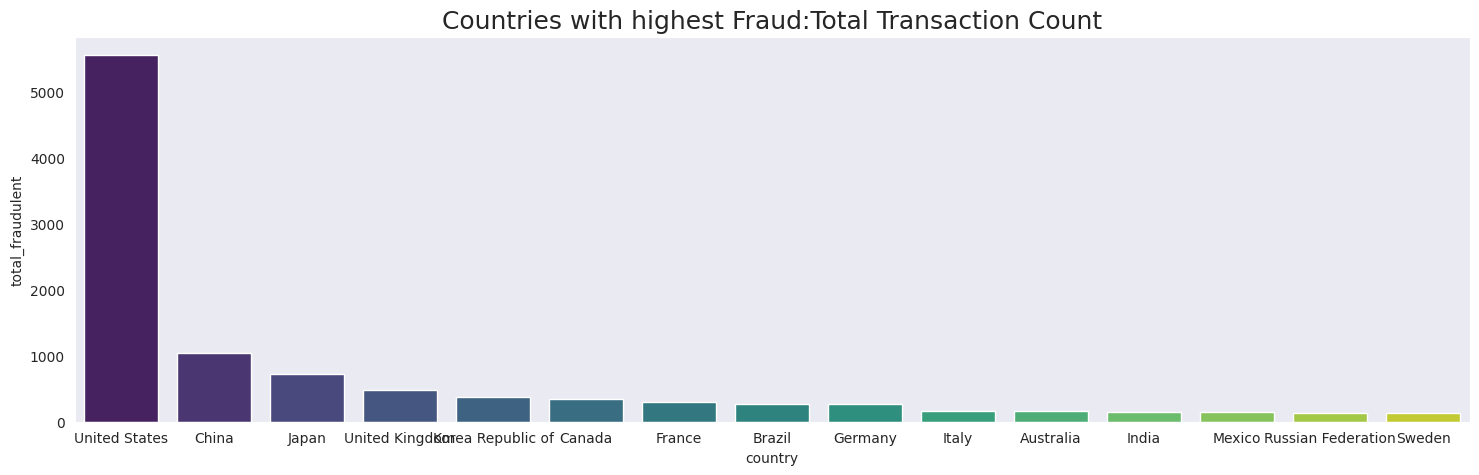

In [90]:
#checking the top 10 country by doing frauds transcations counts
plt.figure(figsize=(18,5))
ax = sns.barplot(x=rate_df4['country'].head(15),y=rate_df4['total_fraudulent'].head(15), palette='viridis')
ax.set_title("Countries with highest Fraud:Total Transaction Count",fontsize=18)

In [91]:
#Converting Categorical values in numerical
source_dict = {'SEO':0, 'Ads':1, 'Direct':2}
fraud.source = fraud.source.replace(source_dict)

#Ordinalize Browser
browser_dict = {'Chrome':0, 'Opera':1, 'Safari':2, 'IE':3, 'FireFox':4}
fraud.browser =fraud.browser.replace(browser_dict)

#Binarize Sex
fraud['sex']=[1 if i == 'M' else 0 for i in fraud['sex']]

In [92]:
fraud2 = fraud.copy()

In [93]:
fraud2.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,0,0,0,39,7.327584e+08,0,Japan,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,1,0,0,53,3.503114e+08,0,United States,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,0,1,0,53,2.621474e+09,1,United States,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,0,2,0,41,3.840542e+09,0,Unknown Country,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,1,2,0,45,4.155831e+08,0,United States,United States


In [94]:
#converting catrgorial values of country in numerical
labels = fraud2['country'].astype('category').cat.categories.tolist()
replace_map = {'country' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [95]:
fraud2.replace(replace_map,inplace=True)
#Fill NaNs with zero
fraud2['country'].fillna(0,inplace=True)

In [96]:
fraud2.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,0,0,0,39,7.327584e+08,0,Japan,85.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,1,0,0,53,3.503114e+08,0,United States,172.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,0,1,0,53,2.621474e+09,1,United States,172.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,0,2,0,41,3.840542e+09,0,Unknown Country,0.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,1,2,0,45,4.155831e+08,0,United States,172.0


In [97]:
from random import random

In [98]:
no_frauds = len(fraud2[fraud2['class'] == 1])
no_fraud_indices = fraud2[fraud2['class'] == 0].index

random_indices = np.random.choice(no_fraud_indices,no_frauds, replace=False)
fraud_indices = fraud2[fraud2['class'] == 1].index

under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = fraud2.loc[under_sample_indices]

In [99]:
under_sample.shape

(28302, 13)

In [100]:
under_sample.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,country
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,0,1,0,53,2.621474e+09,1,United States,172.0
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,2,3,0,35,1.120619e+09,1,United States,172.0
25,59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,0,4,0,36,1.752167e+09,1,United States,172.0
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,0,0,0,27,2.836025e+09,1,United States,172.0
59,345865,2015-02-01 05:59:23,2015-02-20 08:09:10,36,FKQPZUELCRKBL,0,3,0,30,2.740590e+09,1,France,61.0


In [101]:
under_sample['class'].value_counts()

,count
class,
1,14151
0,14151


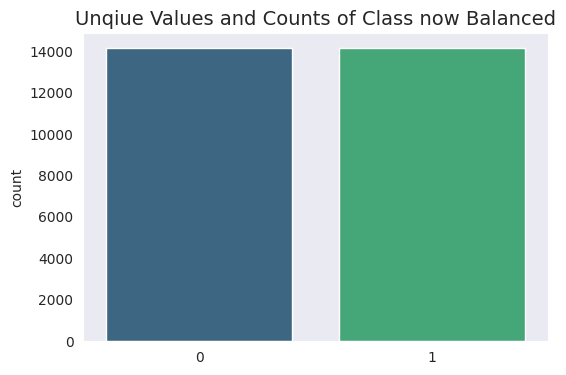

In [104]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x=under_sample['class'].unique(),y=under_sample['class'].value_counts(), palette ='viridis')
ax.set_title("Unqiue Values and Counts of Class now Balanced",fontsize=14);

In [105]:
ih= fraud2._get_numeric_data()

In [106]:
ih.columns

Index(['user_id', 'purchase_value', 'source', 'browser', 'sex', 'age',
       'ip_address', 'class', 'country'],
      dtype='object')

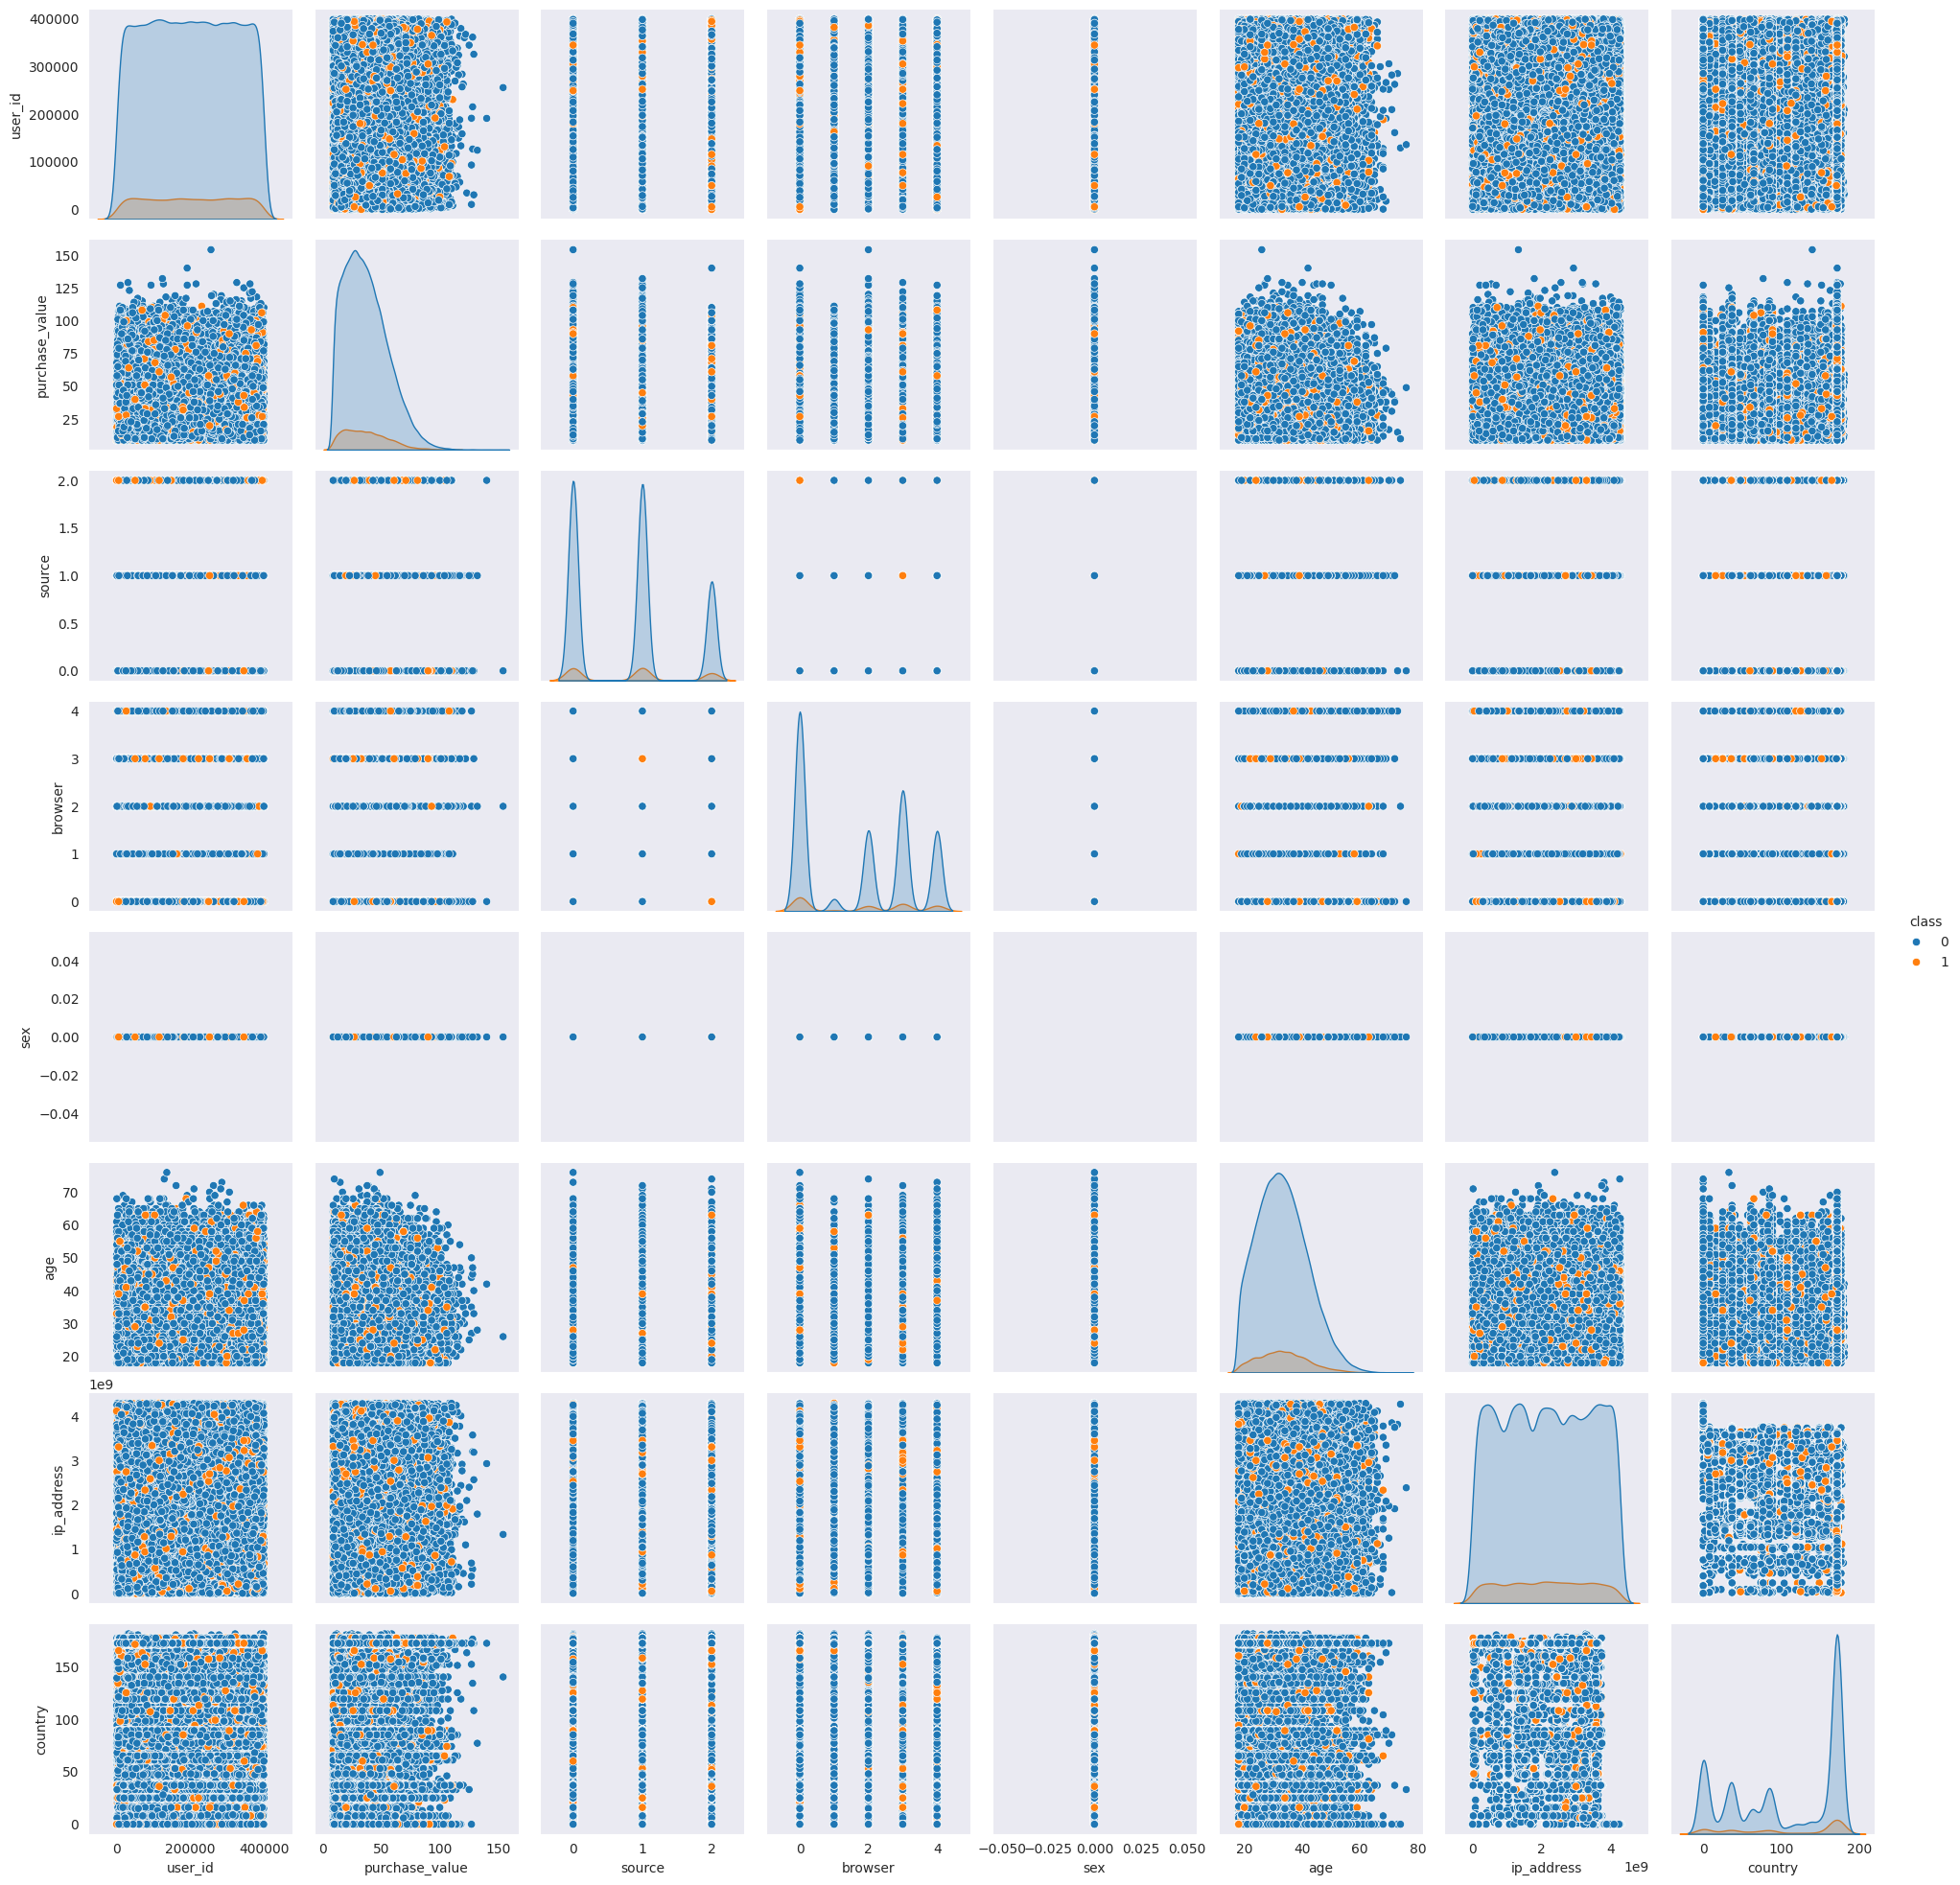

In [107]:
sns.pairplot(ih, hue ='class');

In [ ]:
#Selecting a important variables for model
features = ['user_id',
           'purchase_value',
           'source',
           'browser',
           'sex',
           'age',
           'country']

In [ ]:
X =under_sample[features]
y=under_sample['class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,stratify=y)

In [ ]:
#imported a decision tree model and evaluation metrics
from sklearn.tree import DecisionTreeClassifier

# Assuming you already have X_train, X_test, y_train, and y_test defined

# Create a Decision Tree Classifier instance
dtree = DecisionTreeClassifier()

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
dtree_preds = dtree.predict(X_test)

# Evaluate the model performance
print("Decision Tree Classifier")
print("Precision:", precision_score(y_test, dtree_preds))
print("Recall:", recall_score(y_test, dtree_preds))
print("F1-Score:", f1_score(y_test, dtree_preds))

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Assuming you already have your data (X and y)

# Define the model
dtree = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(dtree, X, y, cv=5, scoring='f1_macro')  # Adjust 'scoring' as needed

# Print the average F1-score across folds
print("Average F1-Score (cross-validation):", cv_scores.mean())





Decision Tree Classifier
Precision: 0.6075246710526315
Recall: 0.632762312633833
F1-Score: 0.619886721208307
Average F1-Score (cross-validation): 0.6348624817535692


In [ ]:
#imported aRandom forest model and evaluation metrics
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf_preds= rf.predict(X_test)
print("RF with default estimators and max_depth")
print("Precision:",precision_score(y_test,rf_preds))
print("Recall",recall_score(y_test,rf_preds))
print("Fl-Score",f1_score(y_test,rf_preds));

RF with default estimators and max_depth
Precision: 0.6902893575282001
Recall 0.6027837259100642
Fl-Score 0.6435756744398718


In [ ]:
for i in [50,100,150]:
    for j in [20,30]:
        for k in [2,5]:
            rf = RandomForestClassifier(n_estimators=i,max_depth=j,min_samples_split=k)
            rf.fit(X_train,y_train)
            rf_preds= rf.predict(X_test)

            print("RF with "+str(i) +" estimators", " and max_depth of "+ str(j)+" and min_sample_split "+str(k))
            print("Precision:",precision_score(y_test,rf_preds))
            print("Recall",recall_score(y_test,rf_preds))
            print("Fl-Score",f1_score(y_test,rf_preds))
            print("")

RF with 50 estimators  and max_depth of 20 and min_sample_split 2
Precision: 0.6741573033707865
Recall 0.6423982869379015
Fl-Score 0.6578947368421052

RF with 50 estimators  and max_depth of 20 and min_sample_split 5
Precision: 0.6799635286072487
Recall 0.6387580299785868
Fl-Score 0.6587170144639507

RF with 50 estimators  and max_depth of 30 and min_sample_split 2
Precision: 0.6853828306264501
Recall 0.6325481798715203
Fl-Score 0.6579064587973273

RF with 50 estimators  and max_depth of 30 and min_sample_split 5
Precision: 0.688681446907818
Recall 0.6319057815845824
Fl-Score 0.659073143495254

RF with 100 estimators  and max_depth of 20 and min_sample_split 2
Precision: 0.6839708561020036
Recall 0.643254817987152
Fl-Score 0.6629883028029133

RF with 100 estimators  and max_depth of 20 and min_sample_split 5
Precision: 0.6916237716424894
Recall 0.6329764453961456
Fl-Score 0.6610017889087657

RF with 100 estimators  and max_depth of 30 and min_sample_split 2
Precision: 0.680520666818908

In [ ]:
#Imported a CRoss validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')  # Adjust 'scoring' as needed

# Print the average F1-score across folds
print("Average F1-Score (cross-validation):", cv_scores.mean())



Average F1-Score (cross-validation): 0.6700929131973259


RandomForestClassifier(n_estimators=10)